# Mathematik für Biologiestudierende

Wintersemester 2025/26

27.01.2026

&copy; 2026 Prof. Dr. Rüdiger W. Braun 

# Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

# Themen

* Korrelation
* empirischer Korrelationskoeffizient
* Lineare Modelle
* Interpretation der Ausgabe
* Lineare Modelle mit mehreren erklärenden Variablen

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats

# Korrelation

* Eine Korrelation zwischen zwei Datensätzen ist eine gemeinsame oder gegenläufige Tendenz.
* Beispielsweise steigt der Blutdruck tendenziell mit dem Alter.
* Gemessen wird die Korrelation durch den empirischen Korrelationskoeffizienten.
* Der empirischen Korrelationskoeffizient beantwortet die Frage
 
>      Gibt es eine Korrelation?

### Beispiel für zwei unkorrelierte Größen

* formal ist es auch möglich, Regressionsplot für zwei unkorrelierte Größen auszurechnen

In [2]:
zufall = pd.DataFrame()
zufall['Zufall1'] = stats.norm.rvs(size=30)
zufall['Zufall2'] = stats.norm.rvs(size=30)
zufall.head()

,Zufall1,Zufall2
0,-1.757526,-0.442905
1,-0.933285,0.925910
2,-0.526359,-0.948934
3,-0.000249,0.427678
4,-1.207605,0.239110


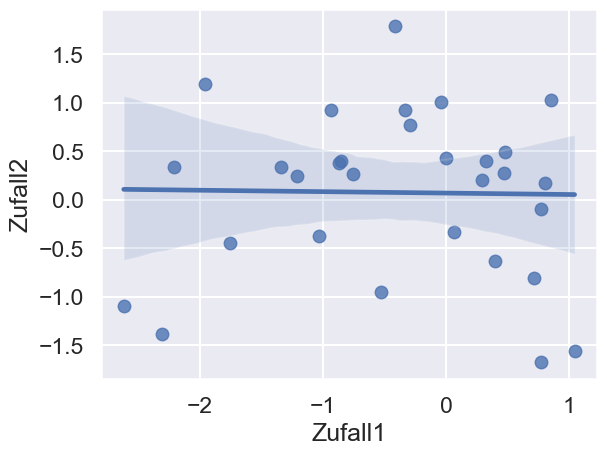

In [3]:
sns.regplot(zufall, x='Zufall1', y='Zufall2');

# Empirischer Korrelationskoeffizient

* Kennzahl zur Überprüfung gemeinsamer Tendenz
* $s_x$ sei die Stichprobenstreuung der $x_j$ und $s_y$ die Stichprobenstreuung der $y_j$ 
* dann ist der *empirische Korrelationskoeffizient* gleich
$$      r = \frac{\text{covar}_{\text{emp}}(x,y)}{s_x \cdot s_y} $$

* Der Korrelationskoeffizient ist dimensionslos

### Beispiel "Zufall"

In [4]:
zufall.cov()

,Zufall1,Zufall2
Zufall1,1.091185,-0.016038
Zufall2,-0.016038,0.723053


In [5]:
sx = zufall.Zufall1.std()
sx

1.0445979798051312

In [6]:
sy = zufall.Zufall2.std()
sy

0.8503255194458601

In [7]:
covar = zufall.Zufall1.cov(zufall.Zufall2)
covar

-0.016038293727881472

In [8]:
r = covar / (sx*sy)
r

-0.018056092390554886

## Interpretation des empirischen Korrelationskoeffizienten

Der Korrelationskoeffizient zeigt an, ob zwei Datensätze eine gemeinsame Tendenz aufweisen

* wenn er nahe bei $1$ liegt, dann wachsen $x$ und $y$ gemeinsam (gemeinsame Tendenz)
* wenn er nahe bei $-1$ liegt, dann fällt $y$, wenn $x$ wächst (gegenläufige Tendenz)
* wenn er nahe bei $0$ liegt, dann gibt es kein gemeinsames Verhalten

* auch ein negativer Korrelationskoeffizient hat eine Bedeutung
* Beispiel:  Je weniger Pestizide ich im Garten ausbringe, desto mehr Bienen habe ich

## Berechnung mit `pandas`

In [9]:
zufall.corr()

,Zufall1,Zufall2
Zufall1,1.000000,-0.018056
Zufall2,-0.018056,1.000000


#### Beispiel: Blutdruckdaten

Wir hatten in der letzten Woche die Kovarianzen für die Blutdruckdaten bestimmt 

In [10]:
blutdruck = pd.read_csv('blutdruckdaten.csv')
blutdruck.cov()

,Alter,Blutdruck,Größe
Alter,231.131034,348.572414,36.128966
Blutdruck,348.572414,750.271264,69.805057
Größe,36.128966,69.805057,28.617195


Jetzt bestimmen wir die Korrelationskoeffizienten

In [11]:
blutdruck.corr()

,Alter,Blutdruck,Größe
Alter,1.000000,0.837056,0.444235
Blutdruck,0.837056,1.000000,0.476392
Größe,0.444235,0.476392,1.000000


* Alter und Blutdruck sind korreliert (aber nicht stark)
* die anderen Größen sind nicht korreliert

#### Beispielgraph mit sehr guter Korrelation

In [12]:
df1 = pd.DataFrame()
P = stats.norm(0.005, 0.005)
stoerung = P.rvs(size=30)     # ganz kleine Störung
df1['Länge'] = np.arange(30)
df1['Breite'] = 5 - 0.002*df1.Länge + stoerung
df1.head()

,Länge,Breite
0,0,5.002884
1,1,5.002982
2,2,5.002795
3,3,4.994563
4,4,4.998038


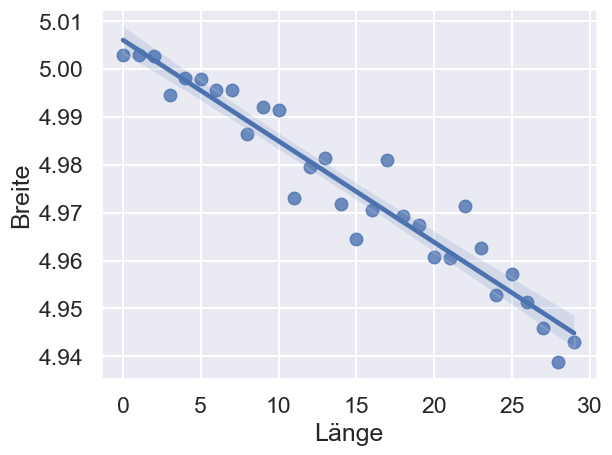

In [13]:
sns.regplot(df1, x='Länge', y='Breite');

In [14]:
df1.corr()

,Länge,Breite
Länge,1.000000,-0.963669
Breite,-0.963669,1.000000


Das darf man nicht verwechseln mit der Steigung der Regressionsgeraden

In [15]:
m = df1.Länge.cov(df1.Breite) / df1.Länge.var()
m

-0.002109113225773512

# Regression zum Mittelwert

* Der Begriff *Regression* kommt von Francis Galton, einem Neffen von Charles Darwin
* Er hatte den auf der nächsten Folie gezeigten Datensatz analysiert
* Auf der $x$-Achse stehen die Größen der Väter in Zoll
* Auf der $y$-Achse stehen die Größen der Söhne in Zoll

In [16]:
galton = pd.read_csv('galton.csv')
galton.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,002,75.5,66.5,73.66,4,1,male,73.5
2,002,75.5,66.5,73.66,4,2,male,72.5
3,003,75.0,64.0,72.06,2,1,male,71.0
4,004,75.0,64.0,72.06,5,1,male,70.5


* Aufbereitung eines Datensatzes von Galton.  Die Aufbereitung stammt aus den Begleitdaten zum Buch "Linear Models with Python" von Faraway

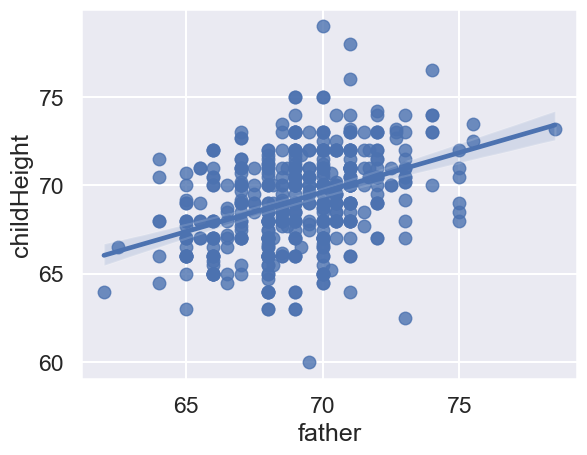

In [17]:
sns.regplot(galton, x='father', y='childHeight');

Die Steigung dieser Geraden ist positiv, aber deutlich kleiner als 1

In [18]:
m = galton.father.cov(galton.childHeight) / galton.father.var()
m

0.44652260468787525

## Regression zum Mittelwert:  Interpretation

* Die Söhne ungewöhnlich großer oder kleiner Väter sind im Mittel selbst zwar auch größer bzw. kleiner als der Mittelwert, aber diese Differenz ist kleiner als bei den Vätern
* Galton bezeichnet dies (ziemlich unfreundlich) als "Regression to mediocrity"
* Das gilt aber nur für die Individuen, nicht für die Population als Ganzes
* auch in der nächsten Generation gibt es wieder ungewöhnlich große Individuen, aber in anderen Familien

# Korrelation &ne; Kausalität

* Wenn der Korrelationskoeffizient von $x$ und $y$ nahe $0$ liegt, dann gibt es keinen kausalen Zusammenhang     zwischen ihnen (seltene nichtlineare Pänomene mal ausgenommen)
* Man kann aber im umgekehrten Fall von einem Korrelationskoeffizienten nahe bei $1$ nicht auf einen kausalen     Zusammenhang schließen

* Zum Beispiel nimmt seit Jahrzehnten in Deutschland sowohl die Zahl der Geburten als auch die Zahl der Störche ab
* Der kausale Zusammenhang ist aber umstritten

* Beispiel aus der Schlafforschung:  Mittagsschlafdauern über 90 Minuten sind ungesund 

<img src="https://imgs.xkcd.com/comics/correlation.png" alt="xkcd Cartoon 552" width="80%"  />

Quelle: http://xkcd.com/552

#### Beispiel: Bleibelastung im Gewebe von Ratten

* kontaminiertes Gelände: fange 10 Ratten
* unbelastetes Vergleichsgelände:  fange 10 Ratten
* für jede Ratte wird ihr Alter in Monaten und der Bleigehalt im Gewebe bestimmt

In [19]:
ratten = pd.read_csv('ratten.csv')
ratten.head()

,Alter,Belastung,Gelände
0,10,63,unkontaminiert
1,12,67,unkontaminiert
2,6,55,unkontaminiert
3,6,42,unkontaminiert
4,11,73,unkontaminiert


In [20]:
kon = ratten[ratten.Gelände=='kontaminiert']
unk = ratten[ratten.Gelände=='unkontaminiert']

In [21]:
kon.describe()

,Alter,Belastung
count,10.000000,10.000000
mean,7.700000,66.500000
std,2.451757,10.384283
min,4.000000,50.000000
25%,6.250000,61.000000
50%,8.000000,66.000000
75%,9.750000,75.250000
max,11.000000,81.000000


In [22]:
unk.describe()

,Alter,Belastung
count,10.000000,10.000000
mean,9.700000,62.500000
std,2.451757,11.017663
min,6.000000,42.000000
25%,8.250000,55.750000
50%,10.000000,65.000000
75%,11.750000,72.000000
max,13.000000,75.000000


* Es gibt einen Unterschied in der Bleibelastung
* aber auch eine große Stichprobenstreuung

In [23]:
stats.ttest_ind(unk.Belastung, kon.Belastung, alternative='less')

TtestResult(statistic=-0.8354714854531734, pvalue=0.20720251637482168, df=18.0)

* Der Unterschied ist $\alpha = 0.05$ nicht signifikant.
* Es fällt aber auf, dass die Ratten von dem belasteten Gebiet im Mittel jünger als die anderen sind.
* Wir wollen das Alter herausrechnen

* Steigt die Bleibelastung mit dem Alter?

In [24]:
kon.corr(numeric_only=True)   #  ohne die Option gibt es einen ValueEror

,Alter,Belastung
Alter,1.000000,0.796465
Belastung,0.796465,1.000000


In [25]:
unk.corr(numeric_only=True)

,Alter,Belastung
Alter,1.00000,0.82883
Belastung,0.82883,1.00000


Wir zeigen beide Regressionen in einem Bild

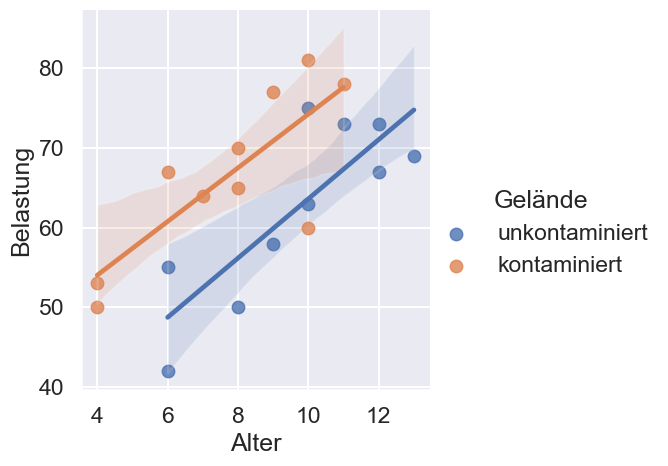

In [26]:
sns.lmplot(ratten, x='Alter', y='Belastung', hue='Gelände');

* die Gerade zu den Daten des kontaminierten Geländes liegt klar oberhalb der Geraden des unkontaminierten Geländes
* für 8 Monate alte Ratten sind dir Konfidenzintervalle disjunkt

* `sns.lmplot` vereint mehrere regplots, ähnlich wie das `sns.displot` tut
* es hat auch ähnliche Optionen

# Lineare Modelle

* eine lineare Funktion einer Variablen ist eine Funktion der Form
$$   y = m \cdot x + b
$$
* bei der linearen Regression besteht die Aufgabe darin, $m$ und $b$ zu bestimmen

Das Konzept des linearen Modells erweitert dieses Verfahren in doppelter Hinsicht

* Konfidenzintervalle für $m$ und $b$ werden bestimmt
* die Zielvariable $y$ kann von mehr als einer Größe abhängen

* Literatur: "Linear Models with Python" von Faraway
* Statsmodels: https://www.statsmodels.org/stable/user-guide.html

Wir beginnen mit den Blutdruckdaten

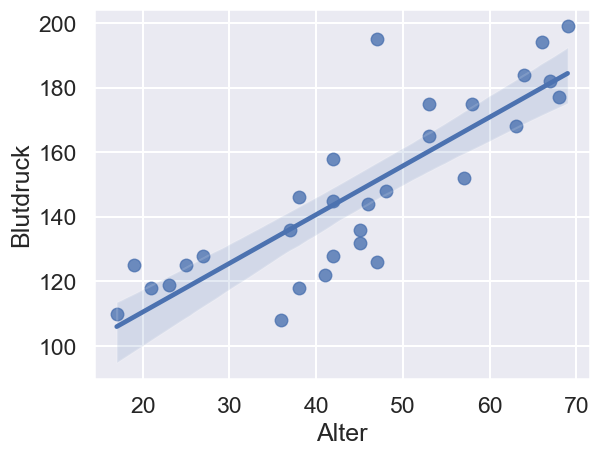

In [27]:
sns.regplot(blutdruck, x='Alter', y='Blutdruck');

# Formulierung des Modells

In [28]:
import statsmodels.formula.api as smf

In [29]:
formel = 'Blutdruck ~ Alter'

Das bedeutet:

* wir wollen den Blutdruck modellieren
* der Blutdruck ist die *abhängige Variable* (engl.  dependent)
* das Alter ist die *erklärende Variable*

In [30]:
modell = smf.ols(formel, blutdruck)

* `ols`: ordinary least squares
* Lektion 25: die Regression ist "bestmöglich" in dem Sinn, dass
$$
    \sum_{j=1}^n (m \cdot x_j + b - y_j)^2 
$$
minimal wird
* daher der Name "Methode der kleinsten Quadrate"  (engl. "lest squares")

In [31]:
res = modell.fit()

# Interpretation der Ausgabe

In [32]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Blutdruck   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     65.54
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           8.17e-09
Time:                        08:19:49   Log-Likelihood:                -123.27
No. Observations:                  30   AIC:                             250.5
Df Residuals:                      28   BIC:                             253.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.3697      8.798      9.135      0.000      62.348      98.391
Alter          1.5081      0.186      8.096      0.000       1.127       1.890
==============================================================================
Omnibus:                        2.886   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                1.526
Skew:                           0.390   Prob(JB):                        0.466
Kurtosis:                       3.782   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Ich werde die wichtigsten Daten aus dieser Ausgabe erkären

* in der ersten Zeile steht der Name der abhängigen Variablen

zum Vergleich:  wir hatten in Lektion 25 die lineare Regression zu Fuß gerechnet und für die Steigung den folgenden Wert erhalten:

In [33]:
cov = blutdruck.Alter.cov(blutdruck.Blutdruck)
var_x = blutdruck.Alter.var()
m = cov / var_x
np.round(m, 4)

1.5081

* Das ist genau die Zahl, die in der Spalte `coef` der Zeile `Alter` steht

* Der Wert für den Ordinatenabschnitt (engl: "intercept") war damals

In [34]:
xq = blutdruck.Alter.mean()
yq = blutdruck.Blutdruck.mean()
b = yq - m*xq
np.round(b, 4)

80.3697

* Das ist die Zahl, die in der Spalte `coef` und der Zeile `Intercept` steht

Wir schauen uns die Zeile `Alter` weiter an:

In [35]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Blutdruck   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     65.54
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           8.17e-09
Time:                        08:19:49   Log-Likelihood:                -123.27
No. Observations:                  30   AIC:                             250.5
Df Residuals:                      28   BIC:                             253.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.3697      8.798      9.135      0.000      62.348      98.391
Alter          1.5081      0.186      8.096      0.000       1.127       1.890
==============================================================================
Omnibus:                        2.886   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                1.526
Skew:                           0.390   Prob(JB):                        0.466
Kurtosis:                       3.782   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Der Eintrag `P>|t|` bezeichnet den p-Wert für den zweiseitigen Test, dass `coef` ungleich 0 ist.
* In der Zeile "Alter" ist `coef` ist die Steigung der linearen Regression, also das $m$ 

* wenn die Nullhypothese $H_0=\{m=0\}$ nicht abgelehnt werden kann, dann bedeutet das, dass zum Signifikanzniveau $\alpha=0.05$ nicht nachgewiesen wurde, dass das Alter überhaupt einen Einfluss auf den Blutdruck hat

* Der Eintrag `t` ist der Wert der Teststatistik, aus dem der p-Wert bestimmt worden ist

# Konfidenzintervalle für die Koeffizienten

In [36]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Blutdruck   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     65.54
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           8.17e-09
Time:                        08:31:09   Log-Likelihood:                -123.27
No. Observations:                  30   AIC:                             250.5
Df Residuals:                      28   BIC:                             253.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.3697      8.798      9.135      0.000      62.348      98.391
Alter          1.5081      0.186      8.096      0.000       1.127       1.890
==============================================================================
Omnibus:                        2.886   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                1.526
Skew:                           0.390   Prob(JB):                        0.466
Kurtosis:                       3.782   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Die Einträge `[0.025` und `0.975]` geben die untere und die obere Vertrauensgrenze des Konfidenzintervalls zum Konfidenzniveau 0.95 für die Steigung an

* Variante:  99%-Konfidenzintervall
* Achtung:  Für Konfidenzintervall zum Konfidenzniveau $1-\alpha$ muss $\alpha$ eingegeben werden

In [37]:
res.conf_int(alpha=.01)

,0,1
Intercept,56.058844,104.680629
Alter,0.993358,2.022874


* Der Wert für $m$ in der Formel für die lineare Regression liegt mit 99% Sicherheit zwischen 0.993 und 2.02

# Korrelationskoeffizienten

In Lektion 25 hatten wir den Korrelationskoeffizienten bestimmt

In [38]:
r = 0.83705

In [39]:
np.round(r**2, 3)

0.701

In [40]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Blutdruck   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     65.54
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           8.17e-09
Time:                        08:31:49   Log-Likelihood:                -123.27
No. Observations:                  30   AIC:                             250.5
Df Residuals:                      28   BIC:                             253.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.3697      8.798      9.135      0.000      62.348      98.391
Alter          1.5081      0.186      8.096      0.000       1.127       1.890
==============================================================================
Omnibus:                        2.886   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                1.526
Skew:                           0.390   Prob(JB):                        0.466
Kurtosis:                       3.782   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* $r^2$ ist die Größe, die in `res.summary()` als `R-squared` auftaucht

# Mehrere erklärende Variablen

## Lineares Modell mit einer abhängigen und mehreren erklärenden Variablen


$$
   y = m_1 \cdot x_1 + m_2 \cdot x_2 + \dots + m_n \cdot x_n + b
$$

$y$ ist die abhängige und die $x_i$ sind die erklärenden Variablen

Beispiel:  Körpergröße der Söhne hängt von der Körpergröße von Vater und Mutter ab

In [51]:
formel = 'childHeight ~ father + mother'

Diese Formel hat 3 Unbekannte:

* den Koeffizienten von `father`
* den Koeffizienten von `mother`
* den Ordinatenabschnitt

In [52]:
modell = smf.ols(formel, galton)

In [53]:
res = modell.fit()

In [54]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     74.62
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           6.25e-29
Time:                        08:34:45   Log-Likelihood:                -1080.7
No. Observations:                 481   AIC:                             2167.
Df Residuals:                     478   BIC:                             2180.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3128      4.095      4.716      0.000      11.266      27.359
father         0.4176      0.046      9.154      0.000       0.328       0.507
mother         0.3288      0.045      7.258      0.000       0.240       0.418
==============================================================================
Omnibus:                       10.653   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.542
Skew:                          -0.200   Prob(JB):                     0.000695
Kurtosis:                       3.752   Cond. No.                     3.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Regressiongleichung:  childHeight = 0.4176 * father + 0.3288 * mother + 19.3128
* alle drei Koeffizienten haben statistisch signifikanten Einfluss

* Der Wert für $r^2$ beträgt 0.238

* Für das Modell, bei dem die Größe des Kindes nur über die Größe des Vaters modelliert wird, beträgt der Wert von $r^2$ nur 0.154
* In dem Modell, welches die Körpergrößen beider Eltern berücksichtigt, ist die Korrelation höher

#### Beispiel: Hinzufügung einer Variablen ohne Einfluss

In [56]:
galton['Kontonummer'] = stats.randint(1, 999999).rvs(size=481)

In [58]:
formel = 'childHeight ~ father + mother + Kontonummer'
modell = smf.ols(formel, galton)
res = modell.fit()

In [59]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     49.66
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           6.05e-28
Time:                        08:35:22   Log-Likelihood:                -1080.6
No. Observations:                 481   AIC:                             2169.
Df Residuals:                     477   BIC:                             2186.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.2725      4.106      4.693      0.000      11.204      27.341
father          0.4178      0.046      9.145      0.000       0.328       0.508
mother          0.3287      0.045      7.247      0.000       0.240       0.418
Kontonummer  6.163e-08    3.7e-07      0.167      0.868   -6.64e-07    7.88e-07
==============================================================================
Omnibus:                       10.666   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.614
Skew:                          -0.199   Prob(JB):                     0.000671
Kurtosis:                       3.756   Cond. No.                     2.18e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Die Kontonummer hat keinen signifikanten Einfluss
* Das erkennt man auch daran, dass 0 im Konfidenzintervall liegt